In [16]:
import pygrib
import os
import xarray as xr
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
import numpy as np

In [17]:
os.listdir('../data')

['air.2022.nc', 'uwnd.2022.nc', 'vwnd.2022.nc']

In [18]:
# read grib file
def read_gribFile(path):
    return pygrib.open(path)


#read netcdf file
def read_netcdfFile(path:str):
    return xr.open_dataset(path)

#get dims
def get_newgridDim(grbs, variable:str, num=0):
    grb = grbs.select(name = variable)[num]
    lats, lons = grb.latlons()
    lat = lats[:,1]
    lon = lons[1,:]
    return lat , lon
    

#interpolar data
def interpolation(data, new_lon, new_lat, method='cubic'):
    return data.interp(lat=new_lat, lon = new_lon, method=method)

def showLevelsOngridFile(data):
    print('levels on the netcdf: ',data.level.values)
    
def getDataByDate(data, var ,month, day, hour):
    return data[var][(data['time'].dt.day == day) & (data['time'].dt.month == month) & ((data['time'].dt.hour == hour))][0]

def getDataBylevel(data, var:str ,level):
    level = data[var].level == level
    return np.where(level == True)[0][0]


In [19]:
gridVariables = ['Temperature', 'U component of wind', 'V component of wind']
netcdfVariables = ['air', 'uwnd', 'vwnd']
gridFilePath = '../../workspace/grib-data/fnl_20220101_00_00.grib2'

In [20]:
test = read_netcdfFile('../data/air.2022.nc')
showLevelsOngridFile(test)

levels on the netcdf:  [1000.  925.  850.  700.  600.  500.  400.  300.  250.  200.  150.  100.
   70.   50.   30.   20.   10.]


In [21]:
dat = getDataByDate(test, 'air' ,2, 1, 18)

In [22]:
print(dat.time.values)

2022-02-01T18:00:00.000000000


In [23]:
getDataBylevel(dat, 'level',1000)

0

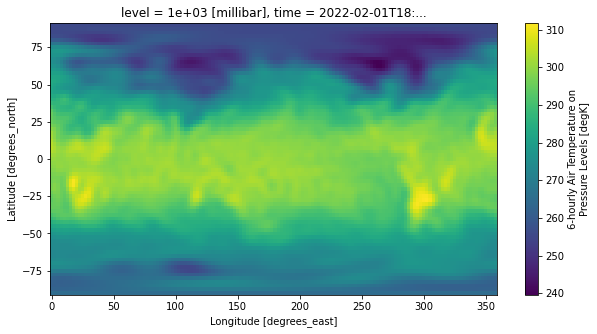

In [24]:
plt.figure(figsize=(10,5))
dat[getDataBylevel(dat, 'level',1000)].plot()
plt.show()

In [27]:
#date --> AAAAMMDD --> MM:int, DD: int, AAAA --> 2022 only -->01/01/2022-00:00:00 ---> 110
#level --> hPa = millibar  --> to have present the real levels on the netcdfFile
def plotting(month, day, hour, level):
    for indx , file in enumerate(os.listdir('../data/')):
            gribs = read_gribFile(gridFilePath)
            lat, lon = get_newgridDim(gribs,gridVariables[indx])
            ds = read_netcdfFile('../data/'+file)
            dataInterpolated = interpolation(ds,lon, lat)
            specificDataDate = getDataByDate(dataInterpolated, netcdfVariables[indx] ,month, day, hour)
            specificDataDateDs = getDataByDate(ds, netcdfVariables[indx] ,month, day, hour)
            idxDataLevel =  getDataBylevel(specificDataDate,'level',level)
            idxDataLevel =  getDataBylevel(specificDataDateDs,'level',level)
            fig, axes = plt.subplots(ncols=2, figsize=(10,5))
            fig.tight_layout(pad=5.0)
            specificDataDateDs[idxDataLevel].plot(ax = axes[0])
            axes[0].set_title('Raw data')
            specificDataDate[idxDataLevel].plot(ax = axes[1])
            axes[1].set_title('Interpolated data')
            plt.show()
            fig.savefig(netcdfVariables[indx]+'.png')
            
    
    

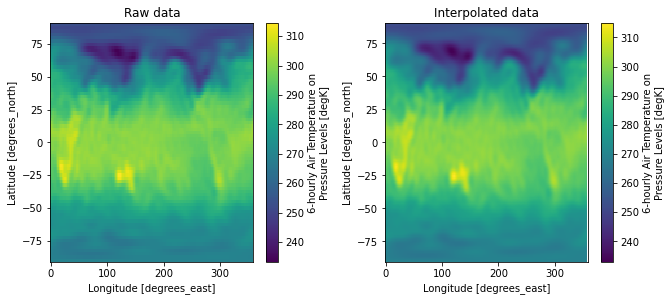

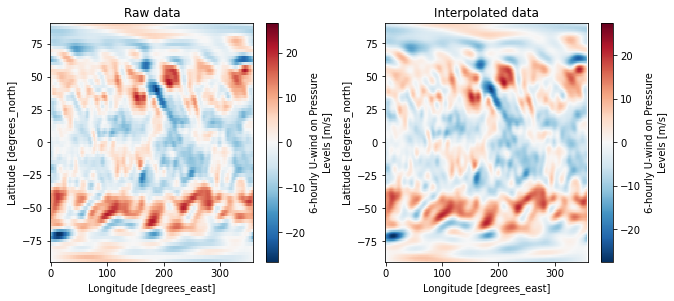

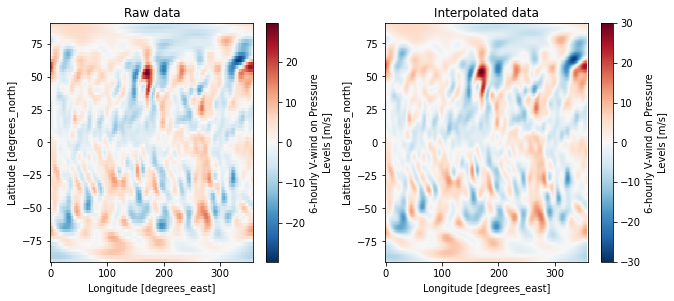

In [28]:
# if not os.path.exists('imagesInterpolation'):
#     os.makedirs('gifs')
plotting(1, 1, 12, 1000)